# Wiener Process

## Imports

In [1]:
import numpy as np
%matplotlib inline
import matplotlib.pyplot as plt
from matplotlib import style
style.use('seaborn-darkgrid')

## Wiener process

Many times series have some measure of randomness. One way of modeling these random processes is using a [Wiener Process](http://en.wikipedia.org/wiki/Wiener_process). For our purposes, A Wiener Process $W(t)$ is a time series for which:

* $W(t=0)=0$
* For any finite time difference $h$, $W(t+h)-W(t)\sim\mathcal{N}(0,h)$

In other words, subsequent values in the time series are normally distributed with a mean of $0$ and variance $h$ and the time series starts with a value of zero. The Wiener Process is also known as Brownian motion; the behavior is identical to that observed in physical diffusion processes.

With this in mind, write a function, `wiener(tmax, n)`, that simulates a discrete Wiener process. Your function should take the maximum time $t_{max}$ and the number of steps `n` and return a tuple of two arrays with length `n`:

* An array of times used $t_i$
* An array of the values of the Wiener process at those times $W_i = W(t_i)$

Here is a rough sketch of how to approach this:

1. Create an array of `n` times $t \in [0,t_{max}]$
2. Find the time difference $h=t_1-t_0$
3. Draw `n-1` random numbers appropriate for the Wiener process
4. Perform a cumulative sum of the random numbers

Use NumPy and no for loops in your implementation.

In [2]:
def wiener(tmax, n):
    """Return one realization of a Wiener process with n steps and a max time of tmax."""
    t = np.linspace(0,tmax,n)
    h = t[1] - t[0]
    
    W = np.random.uniform(low = -1*h, high = h, size = n-1)
    zero = np.array([0.0])
    W = np.concatenate([zero, W])
    W = W.cumsum()
    
    
    total = sum(W)
    return (t,W)
    
    

Call the `wiener` function to simulate a Wiener process with `1000` steps and max time of `1.0`. Save the results as two arrays `t` and `W`.

In [3]:
x = wiener(1.0,1000)
t = x[0]
W = x[1]


In [4]:
assert isinstance(t, np.ndarray)
assert isinstance(W, np.ndarray)
assert t.dtype==np.dtype(float)
assert W.dtype==np.dtype(float)
assert len(t)==len(W)==1000
assert W[0]==0.0

Visualize the process using `plt.plot` with `t` on the x-axis and `W(t)` on the y-axis. Label your x and y axes.

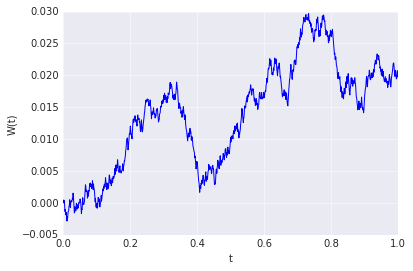

In [5]:
plt.plot(t,W)
plt.xlabel("t")
plt.ylabel("W(t)")

For a given time $t$, $W(t)$ is itself a random variable. Thus if you keep calling `wiener(tmax, n)`, the value of process at the final time will be different each time. To see this, run the following cell a bunch of times. This cell keeps printing the value $W(2.0)$:

In [6]:
t1, W1 = wiener(2.0, 100)
print(W1[-1])

0.0685848043682


There are a number of important theoretical results about the random variable $W(t)$:

* It has a mean of 0, or $E[W(t)]$=0.0.
* It has a variance of $t$, or $E[W(t)^2]-E^2[W(t)]=t$

For $t=2.0$ perform 500 simulations of $W(2.0)$, each with 500 points, and show that the mean is close to $0.0$ and variance close to $2.0$.

In [7]:
total = []
for i in range(500):
    t1, W1 = wiener(2.0, 500)
    total.append( W1[-1])
print(np.mean(total))
print(np.var(total))

0.0016687325149
0.00255664963987


## Geometric brownian motion

[Geometric Brownian Motion](https://en.wikipedia.org/wiki/Geometric_Brownian_motion) is another type of stochastic time series that can be generated using the Wiener Process. Given a Wiener process $W(t)$, the corresponding Geometric Brownian process $X(t)$ is:

$$
X(t) = X_0 e^{((\mu - \sigma^2/2)t + \sigma W(t))}
$$

The parameters $\mu$ and $\sigma$ are known as the *drift* and *volatility* of the process respectively, and $X_0$ is the initial condition $X(t=0)=X_0$. Geometric Brownian motion is used in modelling the prices of financial instruments such as stocks.

Write a function, `geo_brownian`, that generates geometric brownian motion from an existing Wiener process.

Use Numpy and no for loops in your function.

In [8]:

def geo_brownian(t, W, X0, mu, sigma):
    """Return X(t) for geometric brownian motion with drift mu, volatility sigma.
    
    Parameters
    ----------
    t: np.ndarray
        NumPy array of equally spaced time values
    W: np.ndarray
        NumPy arary for a Wiener process at those time values
    X0: float
        The initial value of the Geometric Brownian process
    mu: float
        The drift mu of the Geometric Brownian process
    sigma: float
        The volatility of the Goemetric Brownian process.
    """
    ptOne = ((mu - (sigma *sigma))/2)*t
    ptTwo = W*mu
    ptThree = ptOne + ptTwo
    ptThree = np.exp(ptThree)
    res = ptThree*X0
    return res

Use your function to simulate geometric brownian motion, $X(t)$ for $X_0=1.0$, $\mu=0.5$ and $\sigma=0.3$ with the Wiener process you computed above.

Visualize the process using `plt.plot` with `t` on the x-axis and `X(t)` on the y-axis. Label your x and y axes.

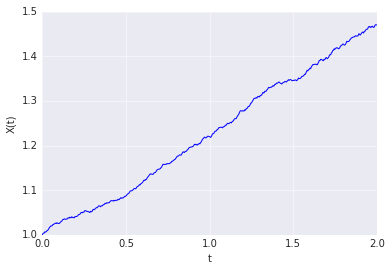

In [9]:
xt = geo_brownian(t1,W1, 1.0, 0.5, 0.3)

plt.plot(t1,xt)
plt.xlabel("t")
plt.ylabel("X(t)")